In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("../../")
sys.path.append("../../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SUnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
net1_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy")
net2_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_128.npy")
net3_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_200.npy")
net4_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_256.npy")

In [3]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [4]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [5]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [6]:
enc_nf = [32, 32, 32, 32]
dec_nf = [32, 32, 32, 32]
net1 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net1_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

(32, 64, 3, 3)


INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.1095788871030231
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 21.75batch/s]
                                                                    INFO: Validation Dice Loss: 0.08875274453516845
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.85batch/s]
                                                                    INFO: Validation Dice Loss: 0.07914412799444827
Validation round:  98%|█████████▊| 89/

Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.65batch/s]
                                                                    INFO: Validation Dice Loss: 0.07254597135297544
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.0712386660359718
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.07056529304155937
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 22.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.0695539469738583
Epoch 1/8: 100%|██████████| 5865/5865 [01:13<00:00, 79.97img/s, loss (batch)=0.223] 
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.54batch/s]
                                                                    INFO: Validat

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.06963537854480219
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.07086667647728553
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.06916676101448772
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.06881858834198543
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.06747156643605494
Epoch 2/8:  68%|██████▊   | 3968/5865 [00:56<00:14, 130.47img/s, loss (batc

Validation round:  93%|█████████▎| 85/91 [00:04<00:00, 17.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.06795417181738131
Validation round: 100%|██████████| 91/91 [00:05<00:00, 23.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.06874856180869617
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.96batch/s]
                                                                    INFO: Validation Dice Loss: 0.06877421514018552
Epoch 2/8: 100%|██████████| 5865/5865 [01:23<00:00, 70.13img/s, loss (batch)=0.222] 
INFO: Checkpoint 2 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.0681554709489529
Validation round:  52%|█████▏    | 47/91 [00:03<00:02, 16.39batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.06790313034594714
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.06806406345996228
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.66batch/s]
                                                                    INFO: Validation Dice Loss: 0.06810037464230925
Validation round: 100%|██████████| 91/91 [00:04<00:00, 23.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.06813021798382748
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.06814845913386607
Validation round:  11%|█         | 10/91 [00:01<00:24,  3.30batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.06815424479626037
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.06815978426199693
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816179853874249
Epoch 3/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.22img/s, loss (batch)=0.24]  
INFO: Checkpoint 3 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816150125238922
Validation round:  82%|████████▏ | 75/91 [00:04<00:00, 17.81batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.17batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816123565147211
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.64batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816073760881529
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.0681613951430216
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 20.54batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816015007731678
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.0681603206219254
Validation round:  24%|██▍       | 22/91 [00:01<00:15,  4.48batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816169717809656
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816148495936132
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816131777160771
Epoch 4/8: 100%|██████████| 5865/5865 [01:25<00:00, 68.80img/s, loss (batch)=0.227] 
INFO: Checkpoint 4 saved !
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 19.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816255129300632
Validation round:  75%|███████▍  | 68/91 [00:04<00:01, 16.64batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816236420974627
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816183145229633
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816162725726327
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816090905404353
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 15.95batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816069003972379
Validation round:  29%|██▊       | 26/91 [00:02<00:13,  4.96batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816102670771736
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 21.73batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816063223631827
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 24.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816098503359072
Epoch 5/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.28img/s, loss (batch)=0.208] 
INFO: Checkpoint 5 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816108729485627
Validation round:  89%|████████▉ | 81/91 [00:04<00:00, 17.56batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816184455221826
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816271143955188
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816319572729068
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 19.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816262473444362
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816145581203503
Validation round:  32%|███▏      | 29/91 [00:02<00:06,  9.52batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816248980524776
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.66batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816204940224742
Validation round: 100%|██████████| 91/91 [00:04<00:00, 21.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816192135051057
Epoch 6/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.50img/s, loss (batch)=0.233] 
INFO: Checkpoint 6 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816233162369047
Validation round: 100%|██████████| 91/91 [00:04<00:00, 23.34batch/s]
                                                                    INFO: Valid

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816157543069713
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816252452004087
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816207191773824
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816277440105166
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816286176115602
Epoch 7/8:  81%|████████▏ | 4776/5865 [01:06<00:08, 135.12img/s, loss (batc

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816250175892652
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816150739297762
Epoch 7/8: 100%|██████████| 5865/5865 [01:23<00:00, 70.22img/s, loss (batch)=0.276] 
INFO: Checkpoint 7 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816209828133112
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 19.46batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816154914897876
Validation round:  96%|█████████▌| 87/91 [00:04<00:00, 18.67batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.10batch/s]
                                                                    INFO: Validation Dice Loss: 0.0681610691187146
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816075512996086
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.10batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816116433877212
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.0681613408602201
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816068275289221
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.91batch/s]
        

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.06816262358820045
Epoch 8/8: 100%|██████████| 5865/5865 [01:25<00:00, 68.98img/s, loss (batch)=0.257] 
INFO: Checkpoint 8 saved !


In [7]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net2 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net2_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(64, 128, 3, 3)


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.53batch/s]
                                                                    INFO: Validation Dice Loss: 0.15026271719853956
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.13284751207946421
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.12466157088567922
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.12201736638179192
Validation round:  54%|█████▍    | 49/91 [00:03<00:03, 13.79batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.10685005153600986
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.11096282303333282
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.64batch/s]
                                                                    INFO: Validation Dice Loss: 0.10365006450440857
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.12batch/s]
                                                                    INFO: Validation Dice Loss: 0.10566790704871272
Epoch 1/8: 100%|██████████| 5865/5865 [01:22<00:00, 71.38img/s, loss (batch)=0.351] 
INFO: Checkpoint 1 saved !
Validation round:  48%|████▊     | 44/91 [00:03<00:04, 10.44batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.1011298031924845
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.09921185123723941
Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.07batch/s]
                                                                    INFO: Validation Dice Loss: 0.10473613981362227
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 21.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.0974466568166083
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.95batch/s]


                                                                    INFO: Validation Dice Loss: 0.10177326480765919
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.09430330377686155
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.09698725933884526
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.46batch/s]
                                                                    INFO: Validation Dice Loss: 0.09843102867131705
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 24.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.09281272064526003
Epoch 2/8: 100%|██████████| 5865/5865 [01:28<00:00, 66.60img/s, loss (batch)=0.322] 
INFO: Checkpoint 2 saved !
Validation round:   1%|         

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.16batch/s]
                                                                    INFO: Validation Dice Loss: 0.09326205083302089
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.09609141978588732
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.09635738676393425
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.94batch/s]
                                                                    INFO: Validation Dice Loss: 0.09081693615887192
Validation round:  36%|███▋      | 33/91 [00:02<00:04, 11.82batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.09104526190312354
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.09063306147908116
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.0915570494892833
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.0897957993732704
Validation round:  81%|████████▏ | 74/91 [00:04<00:01, 16.80batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.12batch/s]
                                                                    INFO: Validation Dice Loss: 0.09017686193788445
Epoch 3/8: 100%|██████████| 5865/5865 [01:29<00:00, 65.30img/s, loss (batch)=0.34]  
INFO: Checkpoint 3 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.73batch/s]
                                                                    INFO: Validation Dice Loss: 0.09083542334181922
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.09048588393808721
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900830287527252
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.81batch/s]
                                                                    INFO: Valida

Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.09033544746401546
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.94batch/s]
                                                                    INFO: Validation Dice Loss: 0.09016403498557898
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 16.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006199068748034
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.09004982740996959
Validation round:  42%|████▏     | 38/91 [00:02<00:03, 13.93batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006156886999424
Epoch 4/8: 100%|██████████| 5865/5865 [01:28<00:00, 66.24img/s, loss (batch)=0.334] 
INFO: Checkpoint 4 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.09005960248983823
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006256266282155
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900623972763072
Validation round:  74%|███████▎  | 67/91 [00:04<00:01, 15.55batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006099026281755
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006113575382547
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 20.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.090063092145291
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.92batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900608037526791
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006081799884419
Validation round:  19%|█▊        | 17/91 [00:01<00:16,  4.52batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006300290207286
Epoch 5/8: 100%|██████████| 5865/5865 [01:30<00:00, 64.96img/s, loss (batch)=0.373] 
INFO: Checkpoint 5 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006547952418799
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 24.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006669929066857
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006746915670541
Validation round:  58%|█████▊    | 53/91 [00:03<00:02, 17.18batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 25.00batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006662740484699
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006702146687351
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 16.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006643082414355
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006779452601632
Validation round:  96%|█████████▌| 87/91 [00:05<00:00, 19.42batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900678561775239
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006884030915879
Epoch 6/8: 100%|██████████| 5865/5865 [01:30<00:00, 64.62img/s, loss (batch)=0.347] 
INFO: Checkpoint 6 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.09006981477960126
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007053863216233
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.58batch/s]
                                                                    INFO: Valida

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007238686739744
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.54batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007165638300088
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007162879129033
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900723376608157
Validation round:  63%|██████▎   | 57/91 [00:03<00:02, 15.51batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007362587438834
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007359377957963
Epoch 7/8: 100%|██████████| 5865/5865 [01:29<00:00, 65.50img/s, loss (batch)=0.355] 
INFO: Checkpoint 7 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007397244919788
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007338278896206
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.09batch/s]
                                                                    INFO: Valid

Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 18.07batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007420407219248
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900755374804958
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 20.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007640682406477
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.17batch/s]
                                                                    INFO: Validation Dice Loss: 0.0900774666077488
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.65batch/s]


                                                                    INFO: Validation Dice Loss: 0.09007746415151345
Validation round:  95%|█████████▍| 86/91 [00:05<00:00, 17.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.09007704454463916
Epoch 8/8: 100%|██████████| 5865/5865 [01:29<00:00, 65.85img/s, loss (batch)=0.355] 
INFO: Checkpoint 8 saved !


In [8]:
enc_nf = [100, 100, 100, 100]
dec_nf = [100, 100, 100, 100]
net3 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net3_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(100, 200, 3, 3)


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.09138654426231489
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.66batch/s]
                                                                    INFO: Validation Dice Loss: 0.09764578119739072
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.09021581635697858
Validation round:  12%|█▏        | 11/91 [00:01<00:17,  4.47batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.09417994271267902
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.27batch/s]
                                                                    INFO: Validation Dice Loss: 0.0930941077870327
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.08565180110079902
Validation round:  46%|████▌     | 42/91 [00:02<00:02, 18.52batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.09089948605377596
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.08876106527807949
Epoch 1/8: 100%|██████████| 5865/5865 [01:54<00:00, 51.29img/s, loss (batch)=0.387] 
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.0885021094601233
Validation round:  71%|███████▏  | 65/91 [00:04<00:01, 19.03batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.12batch/s]
                                                                    INFO: Validation Dice Loss: 0.08480090746185281
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.46batch/s]
                                                                    INFO: Validation Dice Loss: 0.08598748373461294
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.17batch/s]
                                                                    INFO: Validation Dice Loss: 0.08524067839095881
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.10batch/s]
                                                                    INFO: Validation Dice Loss: 0.08548715473203869
Validation round:  14%|█▍        | 13/91 [00:01<00:19,  4.09batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.08482236865457597
Validation round: 100%|██████████| 91/91 [00:05<00:00, 24.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.08535964050135769
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.08488650808295051
Validation round:  51%|█████     | 46/91 [00:03<00:02, 17.48batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.65batch/s]
                                                                    INFO: Validation Dice Loss: 0.08508173793881804
Epoch 2/8: 100%|██████████| 5865/5865 [02:10<00:00, 44.83img/s, loss (batch)=0.384]
INFO: Checkpoint 2 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.08502955177983085
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.08523487692678368
Validation round:  75%|███████▍  | 68/91 [00:04<00:01, 16.51batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.085218703353798
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.08518249607020682
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.08517156222036906
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.08516861064420951
Validation round:   0%|          | 0/91 [00:00<?, ?batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.08516703013862882
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.78batch/s]
                                                                    INFO: Validation Dice Loss: 0.08516402247842851
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.08516099492272178
Epoch 3/8: 100%|██████████| 5865/5865 [02:10<00:00, 44.92img/s, loss (batch)=0.376]
INFO: Checkpoint 3 saved !
Validation round:  27%|██▋       | 25/91 [00:01<00:04, 13.42batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.0851582176573984
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.08515848546892732
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 22.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.08515629237824744
Validation round:  70%|███████   | 64/91 [00:03<00:01, 19.50batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.08515796409203456
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.08515665639232803
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.08515468665531703
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.91batch/s]
                                                                    INFO: Validation Dice Loss: 0.08515391351429971
Validation round:   5%|▌         | 5/91 [00:00<00:48,  1.78batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.85batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514885743568232
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514637639234354
Epoch 4/8: 100%|██████████| 5865/5865 [02:09<00:00, 45.35img/s, loss (batch)=0.42] 
INFO: Checkpoint 4 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514458931736894
Validation round:  55%|█████▍    | 50/91 [00:03<00:02, 16.16batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514530359061209
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514328595701155
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514265830700214
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514380045644529
Validation round:  22%|██▏       | 20/91 [00:01<00:11,  6.15batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.31batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514296721953613
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514220807906035
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514222969393154
Validation round:  80%|████████  | 73/91 [00:04<00:01, 14.92batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.08514100190374878
Epoch 5/8: 100%|██████████| 5865/5865 [02:12<00:00, 44.41img/s, loss (batch)=0.404]
INFO: Checkpoint 5 saved !
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.92batch/s]
                                                                    INFO: Validation Dice Loss: 0.08513808307739404
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.08513655202401864
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.08513614011334848
Validation round:   5%|▌         | 5/91 [00:00<00:46,  1.86batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.08513292637500135
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512901138145845
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512963305462848
Validation round:  59%|█████▉    | 54/91 [00:03<00:02, 18.29batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512957778933285
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512972590032515
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.085131847514556
Epoch 6/8: 100%|██████████| 5865/5865 [02:10<00:00, 44.79img/s, loss (batch)=0.389]
INFO: Checkpoint 6 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.08513050608255052


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512994499651941
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 16.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512667361851577
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512653230310796
Validation round:  57%|█████▋    | 52/91 [00:03<00:02, 16.90batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.08513003612285132
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512680183400165
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512641939815584
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.58batch/s]


                                                                    INFO: Validation Dice Loss: 0.08512478878537377
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.0851244263269089
Epoch 7/8: 100%|██████████| 5865/5865 [02:11<00:00, 44.66img/s, loss (batch)=0.393]
INFO: Checkpoint 7 saved !
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.66batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512447618848674
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512096500003731
Validation round:  15%|█▌        | 14/91 [00:01<00:11,  6.73batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512076678184363
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512001451882688
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512196632531974
Validation round:  38%|███▊      | 35/91 [00:02<00:03, 14.54batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512250808896599
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512313991457551
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.08512059320787807
Validation round:  62%|██████▏   | 56/91 [00:03<00:01, 19.84batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.08511922369291494
Epoch 8/8: 100%|██████████| 5865/5865 [02:10<00:00, 44.79img/s, loss (batch)=0.398]
INFO: Checkpoint 8 saved !


In [9]:
enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]
net4 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net4_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(128, 256, 3, 3)


Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.09551121572871785
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.08824687745872435
Validation round:  46%|████▌     | 42/91 [00:03<00:02, 17.19batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.0875614474599178
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.0898129797571308
Validation round:  87%|████████▋ | 79/91 [00:05<00:00, 17.80batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.08255927256502948
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.08561734994361689
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.08619179077200838
Validation round:  20%|█▉        | 18/91 [00:01<00:08,  8.43batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.08527049438639002
Epoch 1/8: 100%|██████████| 5865/5865 [02:20<00:00, 41.72img/s, loss (batch)=0.322]
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.08318548878798118
Validation round:  58%|█████▊    | 53/91 [00:03<00:02, 17.97batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 16.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.08340525602573877
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.08440889843872615
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.65batch/s]
                                                                    INFO: Validation Dice Loss: 0.08303559604254397
Validation round:   8%|▊         | 7/91 [00:01<00:35,  2.34batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.08313535956236032
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.08298715719809899
Validation round:  53%|█████▎    | 48/91 [00:03<00:02, 17.70batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.08308253895777923
Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 17.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.08324208159695615
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 12.05batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.08322730070942051
Epoch 2/8: 100%|██████████| 5865/5865 [02:41<00:00, 36.36img/s, loss (batch)=0.321]
INFO: Checkpoint 2 saved !
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 16.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.08319513327800311
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.08318715427930538
Validation round:  30%|██▉       | 27/91 [00:02<00:05, 12.30batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 15.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316823242457358
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316776483923524
Validation round:  69%|██████▉   | 63/91 [00:05<00:02, 13.08batch/s]


Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 15.65batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316744618363432
Validation round:  98%|█████████▊| 89/91 [00:06<00:00, 15.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316606741685134
Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831647657758587


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316535993919268
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 16.27batch/s]
                                                                    INFO: Validation Dice Loss: 0.083166662808303
Epoch 3/8: 100%|██████████| 5865/5865 [03:15<00:00, 30.01img/s, loss (batch)=0.349]
INFO: Checkpoint 3 saved !
Validation round:  41%|████      | 37/91 [00:03<00:04, 11.85batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 15.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316807686300068
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316680608869909
Validation round:  90%|█████████ | 82/91 [00:06<00:00, 12.58batch/s]


Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 13.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316564838309864
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 15.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316558190099485
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 15.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316151462085955
Validation round:  30%|██▉       | 27/91 [00:02<00:05, 11.92batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316318486090545
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 13.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316625032451126
Validation round:  90%|█████████ | 82/91 [00:06<00:00, 15.08batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 14.64batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316602385961093
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316718705080367
Epoch 4/8: 100%|██████████| 5865/5865 [03:14<00:00, 30.22img/s, loss (batch)=0.333]
INFO: Checkpoint 4 saved !
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 14.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316490283379188
Validation round:  25%|██▌       | 23/91 [00:02<00:07,  9.52batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 16.06batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316823504455798
Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831645524927548
Validation round:  69%|██████▉   | 63/91 [00:05<00:01, 14.19batch/s]


Validation round: 100%|██████████| 91/91 [00:06<00:00, 18.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316145354247355
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 17.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316204516769765
Validation round: 100%|██████████| 91/91 [00:08<00:00, 12.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316388849046204
Epoch 5/8:  69%|██████▉   | 4064/5865 [02:10<00:34, 52.10img/s, loss (batch)=0.327]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316523909241288
Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.96batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316506248909039
Validation round:  26%|██▋       | 24/91 [00:02<00:06, 10.05batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831645158129734
Epoch 5/8: 100%|██████████| 5865/5865 [03:11<00:00, 30.61img/s, loss (batch)=0.319]
INFO: Checkpoint 5 saved !
Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831652657016293
Validation round:  54%|█████▍    | 49/91 [00:04<00:03, 11.78batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.92batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316595500314629
Validation round: 100%|██████████| 91/91 [00:07<00:00, 16.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831711450284654
Validation round:  84%|████████▎ | 76/91 [00:07<00:01, 14.34batch/s]


Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 13.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316779824403617
Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316726949843732
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316679634563215
Validation round:   5%|▌         | 5/91 [00:01<00:41,  2.07batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.78batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316533103748992
Validation round: 100%|██████████| 91/91 [00:08<00:00, 14.91batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831636294395059
Validation round:  34%|███▍      | 31/91 [00:02<00:04, 13.73batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316348353912542
Epoch 6/8: 100%|██████████| 5865/5865 [03:15<00:00, 30.06img/s, loss (batch)=0.324]
INFO: Checkpoint 6 saved !
Validation round: 100%|██████████| 91/91 [00:07<00:00, 13.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316016098955176
Validation round:  63%|██████▎   | 57/91 [00:05<00:03, 11.27batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316187642432832
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.08316082335435428
Validation round:  96%|█████████▌| 87/91 [00:07<00:00, 13.84batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 13.64batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315924579625601
Validation round: 100%|██████████| 91/91 [00:08<00:00, 15.96batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315881603694224
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315732608457188
Validation round:  23%|██▎       | 21/91 [00:02<00:07,  9.01batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 13.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315994958956163
Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315822654045545
Validation round:  55%|█████▍    | 50/91 [00:04<00:03, 12.02batch/s]


Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 11.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315970101854303
Epoch 7/8: 100%|██████████| 5865/5865 [03:17<00:00, 29.69img/s, loss (batch)=0.337]
INFO: Checkpoint 7 saved !
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315867750526784
Validation round:  90%|█████████ | 82/91 [00:06<00:00, 13.82batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315748033615258
Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315674657677556
Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831557633457603
Validation round:  13%|█▎        | 12/91 [00:01<00:16,  4.86batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315601478238682
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.0831571618443007
Validation round:  62%|██████▏   | 56/91 [00:03<00:01, 18.02batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315445359919098
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315618598199152
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.08315696166111873
Epoch 8/8: 100%|██████████| 5865/5865 [02:59<00:00, 32.74img/s, loss (batch)=0.316]
INFO: Checkpoint 8 saved !


configuring combined plots


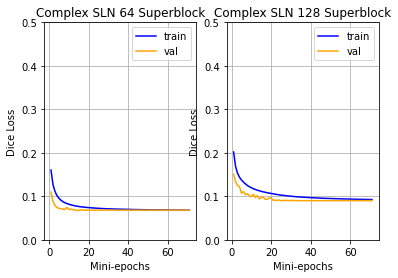

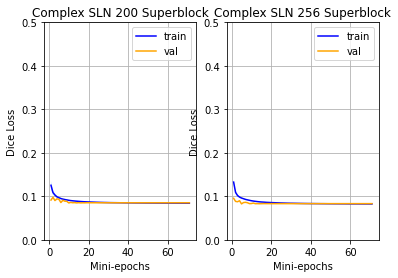

In [10]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a1 = plt.subplot(1,2,1)
a1.set_ylim([0, 0.5])
plt.title("Complex SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a1.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a1.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.5])
plt.title("Complex SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.5])
plt.title("Complex SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.5])
plt.title("Complex SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores4, train_var_4)]
ziptraindown = [a - b for a, b in zip(train_scores4, train_var_4)]
zipvalup = [a + b for a, b in zip(val_scores4, val_var_4)]
zipvaldown = [a - b for a, b in zip(val_scores4, val_var_4)]

plt.plot(x_values, train_scores4, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores4, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

plt.close()